<a href="https://colab.research.google.com/github/kelvynlukito/Internship_PADMI_SentimentAnalysis/blob/main/Internship_PADMI_SentimentAnalysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

## **Import Library**

In [ ]:
!pip install Sastrawi

In [ ]:
!pip install gensim
!pip install pyLDAvis

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## **Import Dataset**

In [ ]:
url = "https://github.com/kelvynlukito/Internship_PADMI_TopicModelling/raw/main/INA_TweetsPPKM_Labeled_V1.xlsx"
url_ig = "https://github.com/kelvynlukito/Internship_PADMI_SentimentAnalysis/blob/main/dataset_komentar_instagram_cyberbullying.csv"
response = requests.get(url)
response_ig = requests.get(url_ig)
df_ig = pd.read_csv(BytesIO(response_ig.content))
df = pd.read_excel(BytesIO(response.content))

In [ ]:
df.head()

,Date,User,Tweet,Sentiment
0,2022-03-26 12:51:44,CendekiaDelapan,Karena stimulasi untuk #anakberkebutuhankhusus...,2
1,2022-03-23 01:10:09,ViantAntony,Ye ampun mbh anda seorang Wapres loh.&amp;Gela...,2
2,2022-03-22 21:10:19,mtaufikmJKT48,Mulaik kumat lagi. 😀 #ppkm https://t.co/MNDSPH...,2
3,2022-03-22 15:43:24,PunditPintar,"Welcome PPKM bau bau naik level nih, gimana ni...",2
4,2022-03-22 15:30:34,PYI_Indonesia,"Sesungguhnya Allah tidak menciptakan kita, ham...",2


In [ ]:
df.describe()

,Date,Sentiment
count,21043,21043.000000
mean,2021-08-02 20:34:17.575013120,0.734734
min,2020-05-06 12:34:13,0.000000
25%,2021-07-09 04:24:20.500000,0.000000
50%,2021-07-27 15:17:20,1.000000
75%,2021-08-29 10:57:11,1.000000
max,2022-03-31 22:32:04,2.000000
std,NaN,0.752062


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21043 entries, 0 to 21042
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       21043 non-null  datetime64[ns]
 1   User       21043 non-null  object        
 2   Tweet      21043 non-null  object        
 3   Sentiment  21043 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 657.7+ KB


In [ ]:
df['Sentiment'].unique()

array([2, 1, 0])

In [ ]:
df['Sentiment'].value_counts()

Sentiment
0    9482
1    7661
2    3900
Name: count, dtype: int64

In [ ]:
df['Sentiment'].nunique()

3

In [ ]:
df_1 = df[df['Sentiment'] == 1].sample(n=300)

In [ ]:
df_0 = df[df['Sentiment'] == 0].sample(n=300)

In [ ]:
df_2 = df[df['Sentiment'] == 2].sample(n=300)

In [ ]:
df = pd.concat([df_1,df_2,df_0])

In [ ]:
df = df.rename(columns={"Tweet" :"Text"})

In [ ]:
df_test = df

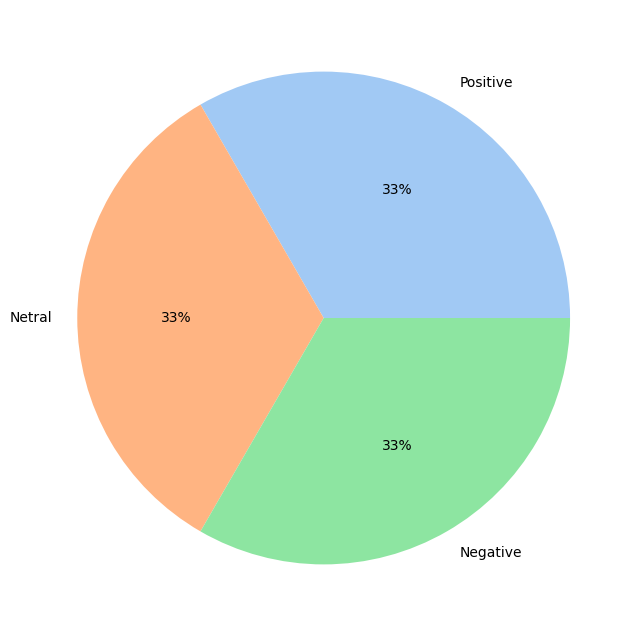

In [ ]:
# Define Plot
plt.figure(figsize=(8,8))

# Define Data
data = df['Sentiment'].value_counts()
labels = ['Positive','Netral', 'Negative']

# Define Pie Chart Color
colors = sns.color_palette('pastel')[0:5]

# Define Pie Chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## **Cleaning Text with Sastrawi**

In [ ]:
# Access Custom Stopwords list with txt file
import urllib.request
url = "https://raw.githubusercontent.com/kelvynlukito/Internship_PADMI_SentimentAnalysis/main/"
file_name = "stopwords-id.txt"
urllib.request.urlretrieve(url+file_name, file_name)

('stopwords-id.txt', <http.client.HTTPMessage at 0x78afde6c3d30>)

In [ ]:
# Acces content in txt file
file_object = open('stopwords-id.txt', 'r')
FileContent = file_object.read()
print(FileContent)

ada
adalah
adanya
adapun
agak
agaknya
agar
akan
akankah
akhir
akhiri
akhirnya
aku
akulah
amat
amatlah
anda
andalah
antar
antara
antaranya
apa
apaan
apabila
apakah
apalagi
apatah
artinya
asal
asalkan
atas
atau
ataukah
ataupun
awal
awalnya
bagai
bagaikan
bagaimana
bagaimanakah
bagaimanapun
bagi
bagian
bahkan
bahwa
bahwasanya
baik
bakal
bakalan
balik
banyak
bapak
baru
bawah
beberapa
begini
beginian
beginikah
beginilah
begitu
begitukah
begitulah
begitupun
bekerja
belakang
belakangan
belum
belumlah
benar
benarkah
benarlah
berada
berakhir
berakhirlah
berakhirnya
berapa
berapakah
berapalah
berapapun
berarti
berawal
berbagai
berdatangan
beri
berikan
berikut
berikutnya
berjumlah
berkali-kali
berkata
berkehendak
berkeinginan
berkenaan
berlainan
berlalu
berlangsung
berlebihan
bermacam
bermacam-macam
bermaksud
bermula
bersama
bersama-sama
bersiap
bersiap-siap
bertanya
bertanya-tanya
berturut
berturut-turut
bertutur
berujar
berupa
besar
betul
betulkah
biasa
biasanya
bila
bilakah
bisa
bisakah
boleh


In [ ]:
file_stopwords = pd.read_csv('https://raw.githubusercontent.com/kelvynlukito/Internship_PADMI_SentimentAnalysis/main/stopwords-id.txt',
                             delimiter='\t',
                             header=None)

In [ ]:
custom_stopwords = my_array = np.array(file_stopwords.values.flatten())

In [ ]:
custom_stopwords

array(['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar',
       'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah',
       'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara',
       'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi',
       'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah',
       'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana',
       'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan',
       'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik',
       'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini',
       'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah',
       'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan',
       'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada',
       'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah',
       'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai',
       'berdatangan', 'beri', '

In [ ]:
# Cleaning text custom function
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# function for remove spesial charater
def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

# function for remove urls
def remove_urls(text):
    # Remove words starting with "https"
    text = re.sub(r'\bhttps\w*\s*', '', text)

    # Remove URLs starting with www.
    text = re.sub(r'www\.\S+', '', text)

    return text

# function for remove hashtags
def remove_hashtags(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    return text

def remove_tag_accounts(text):
    # Remove tag accounts starting with '@'
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'<\w+', '', text)

    return text

# function for remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

# function for remove stopwords
def remove_stopwords(text, custom_stopwords):
    # Create Stopword Remover
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Get default stopwords
    stopwords = []

    # Add custom stopwords
    stopwords.extend(custom_stopwords)

    # Remove stopwords from text
    words = text.split()
    cleaned_words = [word for word in words if word not in stopwords]
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# function for stemming text
def stem_text(text):
    # Stem words using Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
# apply custom function for cleaning text
df_test['Cleaned_Text'] = df_test['Text'].apply(remove_urls)
df_test['Cleaned_Text'] = df_test['Text'].apply(remove_hashtags)
df_test['Cleaned_Text'] = df_test['Text'].apply(remove_tag_accounts)
df_test['Cleaned_Text'] = df_test['Text'].apply(remove_emoji)
df_test['Cleaned_Text'] = df_test['Text'].apply(clean_text)
df_test['Cleaned_Text'] = df_test['Text'].apply(lambda x: remove_stopwords(x, custom_stopwords))
df_test['Cleaned_Text'] = df_test['Cleaned_Text'].apply(stem_text)

In [ ]:
df.head()

,Date,User,Text,Sentiment,Cleaned_Text
8842,2021-08-24 00:03:37,integritas_news,Presiden RI Joko Widodo turunkan level Pemberl...,1,presiden ri joko widodo turun level laku batas...
10315,2021-08-09 21:28:43,GTVID_News,Pemerintah resmi mengumumkan perpanjangan Pemb...,1,perintah resmi umum panjang laku batas giat ma...
8554,2021-08-27 21:24:00,newsmerahputih,"Gelar PTM terbatas, Pemerintah Pusat diminta d...",1,gelar ptm batas perintah pusat damping pemda m...
18311,2021-02-01 12:30:00,inewsdotid,Presiden Joko Widodo menyebut tak masalah jika...,1,presiden joko widodo sebut ekonomi turun ppkm ...
4653,2022-02-03 14:29:02,indrajatimcom,Wali Kota Surabaya Eri Cahyadi menyebutkan Kot...,1,wali kota surabaya eri cahyadi kota pahlawan j...


In [ ]:
df['Cleaned_Text']

8842     presiden ri joko widodo turun level laku batas...
10315    perintah resmi umum panjang laku batas giat ma...
8554     gelar ptm batas perintah pusat damping pemda m...
18311    presiden joko widodo sebut ekonomi turun ppkm ...
4653     wali kota surabaya eri cahyadi kota pahlawan j...
                               ...                        
16187    tingkat huni hotel batam lonjak jelang ppkmdar...
19183    hadir kembali boss mega win dari https t co 3g...
13137    atur ppkm level 4 mulai laku hari ini https t ...
16389    trending etua umum dewan masjid indonesia dmi ...
18975    atur ppkm tumpang angkut umum turun jika tidak...
Name: Cleaned_Text, Length: 900, dtype: object

In [ ]:
df['Text']

8842     Presiden RI Joko Widodo turunkan level Pemberl...
10315    Pemerintah resmi mengumumkan perpanjangan Pemb...
8554     Gelar PTM terbatas, Pemerintah Pusat diminta d...
18311    Presiden Joko Widodo menyebut tak masalah jika...
4653     Wali Kota Surabaya Eri Cahyadi menyebutkan Kot...
                               ...                        
16187    Tingkat hunian hotel di #Batam melonjak naik j...
19183    Hadir Kembali Boss!! MEGA WIN Dari https://t.c...
13137    Aturan PPKM Level 4 yang Mulai Berlaku Hari In...
16389    #TRENDING\n\netua Umum Dewan Masjid Indonesia ...
18975    Aturan #PPKM, Penumpang Angkutan Umum Diturunk...
Name: Text, Length: 900, dtype: object

In [ ]:
corpus = df['Cleaned_Text'].values

In [ ]:
print(corpus)

['presiden ri joko widodo turun level laku batas giat masyarakat daerah tanggal 24 30 agustus 2021 presiden jokowi ppkm indonesia https t co cgihrh42vh'
 'perintah resmi umum panjang laku batas giat masyarakat ppkm level 4 pulau jawa-bali senin 16 agustus 2021 kini ppkm ppkmlevel4 perintah inews indonesia news berita https t co blr0s4sadk'
 'gelar ptm batas perintah pusat damping pemda merahputihcom ppkm covid19 pandemic https t co ob6igx1jyu'
 'presiden joko widodo sebut ekonomi turun ppkm covid-19 turun ppkm https t co ffmahpac0z'
 'wali kota surabaya eri cahyadi kota pahlawan jawa timur potensi status ppkm level 1 level 2 susul angka positif covid-19 naik ppkm covid19 indrajatim https t co ugo0zhtiv5'
 'situasi lintas kawasan senayan laku ganjil-genap kamis 12 08 21 pantau ramai lancar pot ppkm ganjilgenap jakarta inewssore inews https t co i4juhe3k3q'
 'saya jual anolyte ag hand sanit harga rp25 000 dapat shopee sekarang https t co sgnkbil5pp shopeeid kirim dari jln bintaro raya ta

## **Creating Bag of Words**

In [ ]:
# count vectorizer text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df['Sentiment'].values

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

## **Splitting Training and Testing Dataset**

In [ ]:
# split training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **Training Naive Bayes Model**

In [ ]:
# import naive bayes model
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = clf_NB.predict(X_test)
classifier_results = np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1), y_test.reshape(len(y_test),1)),1)

In [ ]:
# confussion matrix for calculated accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
accuracy_score(y_test, y_pred_NB)

[[25 26 25]
 [15 45 11]
 [16  6 56]]


0.56

Text(0.5, 1.0, 'Accuracy Score 0.56')

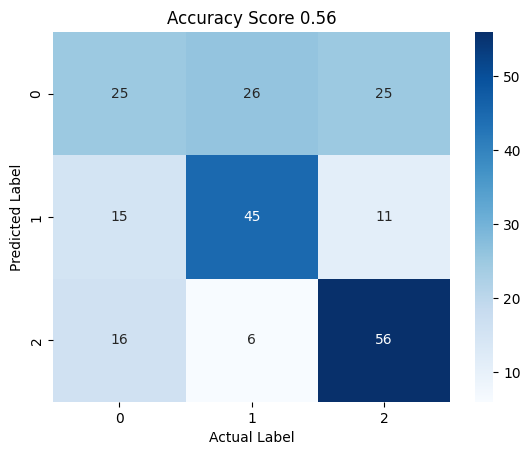

In [ ]:
# confussion matrix for calculated accuracy
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title(f'Accuracy Score {accuracy_score(y_pred_NB,y_test)}')

## **Training Support Vectore Classifier Model**

In [ ]:
# import SVC model
from sklearn.svm import SVC
clf_SVC = SVC()
clf_SVC.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVC = clf_SVC.predict(X_test)
classifier_results = np.concatenate((y_pred_SVC.reshape(len(y_pred_SVC),1), y_test.reshape(len(y_test),1)),1)

In [ ]:
# confussion matrix for calculated accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)
accuracy_score(y_test, y_pred_SVC)

[[53 16  7]
 [21 47  3]
 [14  3 61]]


0.7155555555555555

Text(0.5, 1.0, 'Accuracy Score 0.7155555555555555')

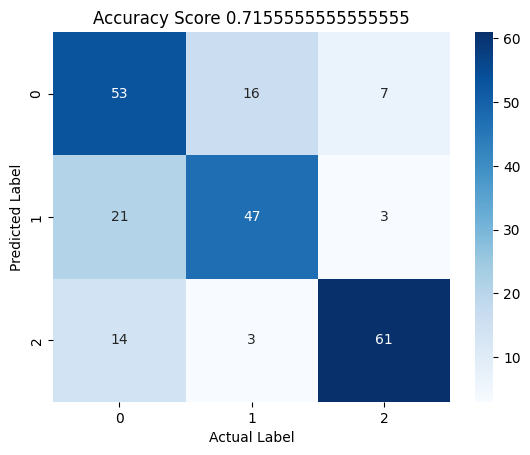

In [ ]:
# confussion matrix for calculated accuracy
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title(f'Accuracy Score {accuracy_score(y_pred_SVC,y_test)}')

## **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import classification_report
# Classification Report Naive Bayes
print("Naive Bayes")
print(classification_report(y_test, y_pred_NB))

Naive Bayes
              precision    recall  f1-score   support

           0       0.45      0.33      0.38        76
           1       0.58      0.63      0.61        71
           2       0.61      0.72      0.66        78

    accuracy                           0.56       225
   macro avg       0.55      0.56      0.55       225
weighted avg       0.55      0.56      0.55       225



In [ ]:
from sklearn.metrics import classification_report
# Classification Report Naive Bayes
print("Support Vector Classificaiton")
print(classification_report(y_test, y_pred_SVC))

Support Vector Classificaiton
              precision    recall  f1-score   support

           0       0.60      0.70      0.65        76
           1       0.71      0.66      0.69        71
           2       0.86      0.78      0.82        78

    accuracy                           0.72       225
   macro avg       0.72      0.71      0.72       225
weighted avg       0.73      0.72      0.72       225



## **Visualize Bar Chart for Each Sentiment Class**

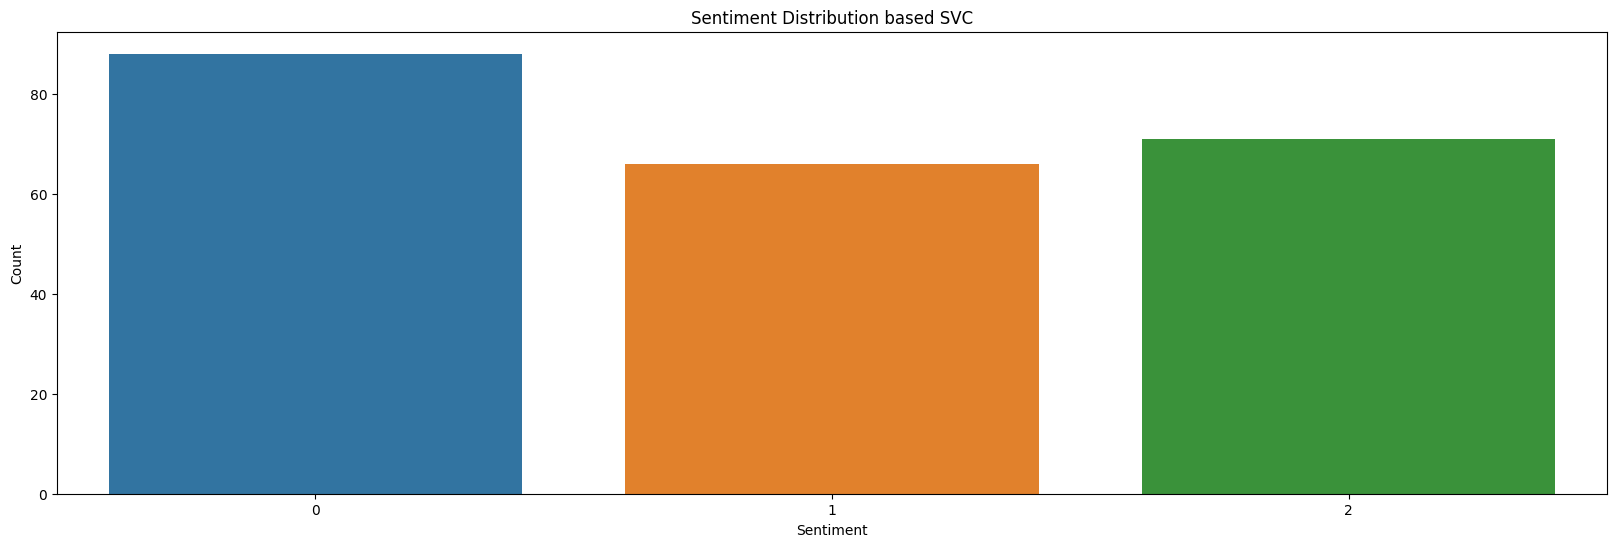

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_SVC is a pandas Series
y_pred_SVC = pd.Series(y_pred_SVC)

# Count the occurrences of each value in y_pred_SVC
value_counts = y_pred_SVC.value_counts()

# Convert value_counts to a DataFrame
df = pd.DataFrame({'Sentiment': value_counts.index, 'Count': value_counts.values})

# Create a bar chart
plt.figure(figsize=(20,6))
sns.barplot(data=df, x='Sentiment', y='Count')
sns.color_palette('pastel')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution based SVC')
plt.show()

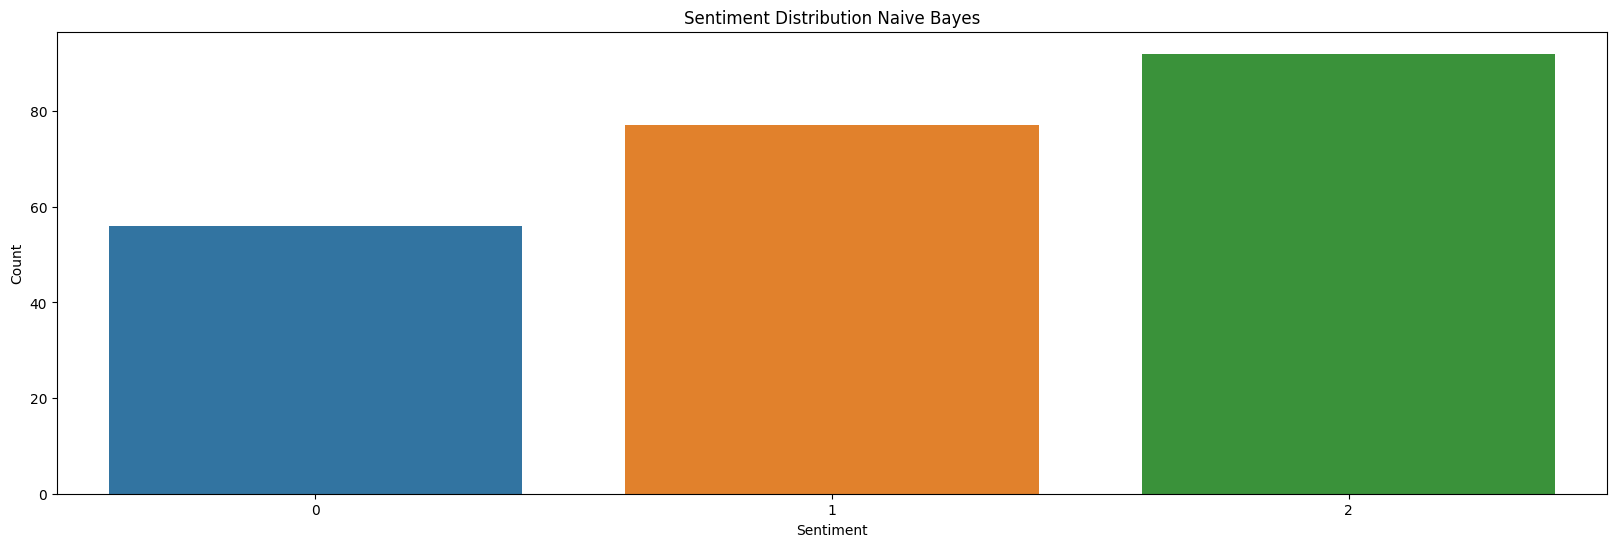

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_NB is a pandas Series
y_pred_NB = pd.Series(y_pred_NB)

# Count the occurrences of each value in y_pred_NB
value_counts = y_pred_NB.value_counts()

# Convert value_counts to a DataFrame
df = pd.DataFrame({'Sentiment': value_counts.index, 'Count': value_counts.values})

# Create a bar chart
plt.figure(figsize=(20,6))
sns.color_palette("rocket", as_cmap=True)
sns.barplot(data=df, x='Sentiment', y='Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Naive Bayes')
plt.show()

# **Testing Sentimen Analysis with Real Data**

## **Input Bulk Text For Sentiment Analysis Process**

In [ ]:
df_input = pd.read_excel("https://github.com/kelvynlukito/Internship_PADMI_TopicModelling/raw/main/INA_TweetsPPKM_Labeled_V1.xlsx")
df_input

## **Cleaning Input Bulk Text**

In [ ]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

def remove_urls(text):
    # Remove words starting with "https"
    text = re.sub(r'\bhttps\w*\s*', '', text)

    # Remove URLs starting with www.
    text = re.sub(r'www\.\S+', '', text)

    return text

def remove_hashtags(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

def remove_stopwords(text):
    # Remove stopwords using Sastrawi and custom stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()

    # Add custom stopwords

    custom_stopwords = ['https', 't', 'co']
    stopword = StopWordRemoverFactory().get_stop_words() + custom_stopwords

    return ' '.join([word for word in text.split() if word not in stopword])

def stem_text(text):
    # Stem words using Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
df_input['Cleaned_Text'] = df_input[''].apply(remove_urls)
df_input['Cleaned_Text'] = df_input['text'].apply(remove_emoji)
df_input['Cleaned_Text'] = df_input['text'].apply(clean_text)
df_input['Cleaned_Text'] = df_input['Cleaned_Text'].apply(remove_stopwords)
df_input['Cleaned_Text'] = df_input['Cleaned_Text'].apply(stem_text)

In [ ]:
df_input.head()

In [ ]:
corpus = df_input['Cleaned_Text'].values

## **Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X_input = cv.fit_transform(corpus).toarray()

In [ ]:
X_input.shape

In [ ]:
print(X_input)

## **Show Sentiment Result**

In [ ]:
y_pred = clf_SVC.predict(X_input)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_NB is a pandas Series
y_pred = pd.Series(y_pred)

# Count the occurrences of each value in y_pred_NB
value_counts = y_pred.value_counts()

# Convert value_counts to a DataFrame
df_output = pd.DataFrame({'Sentiment': value_counts.index, 'Count': value_counts.values})

# Create a bar chart
plt.figure(figsize=(20,6))
sns.color_palette("rocket", as_cmap=True)
sns.barplot(data=df_output, x='Sentiment', y='Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Naive Bayes')
plt.show()

# **Topic Modelling using LDA**

In [ ]:
import pandas as pd
import re
import gensim
from gensim import corpora
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Load Bahasa Indonesia stopwords
stopwords_factory = StopWordRemoverFactory()
stopwords = stopwords_factory.get_stop_words()

# Load your Bahasa Indonesia dataset
# Replace 'your_dataset.csv' with your actual dataset file
df_input = pd.read_csv("https://raw.githubusercontent.com/kelvynlukito/Internship_PADMI_SentimentAnalysis/main/dataset_komentar_instagram_cyberbullying.csv")

# Preprocess text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

# Apply preprocessing to the text column
df_input['processed_text'] = df_input['Instagram Comment Text'].apply(preprocess_text)
# df_input['processed_text'] = df_input['Instagram Comment Text'].apply(remove_emoji)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df_input['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_input['processed_text']]

# Perform topic modeling (LDA)
num_topics = 5  # Set the number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualize the topics
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

In [ ]:
# Print the topics
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

In [ ]:
from wordcloud import WordCloud

# Extract the top words from the topic
topic_id = [0,1,2,3,4]  # Specify the topic ID

for topic in topic_id:
  top_words = lda_model.show_topic(topic, topn=10)  # Change topn value as desired

  # Create a dictionary of word frequencies
  word_freq = {word: freq for word, freq in top_words}

  # Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

  # Display the word cloud
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Topik : {topic}')
  plt.axis('off')
  plt.show()